# Adaptive Histogram Equalization

In [33]:
from skimage import exposure
from tifffile import imread, imsave
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import numpy as np
figsize(6, 6)

plt.set_cmap('gray')

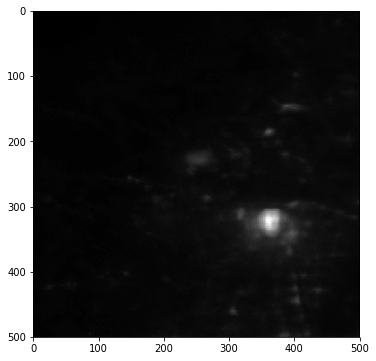

In [45]:
input_tif_path = '../data/s3617/tifs/cell_detection_0.tiff'
img = imread(input_tif_path)

# plt.hist(img.flatten(), bins=256)
# plt.show()

# img_slice = img[75, :, :]
# plt.imshow(img_slice)
# plt.show()

# plt.hist(img_slice.flatten(), bins=256)
# plt.show()

# hist_slice = exposure.equalize_adapthist(img_slice)
# plt.imshow(hist_slice)
# plt.show()

# plt.hist(hist_slice.flatten(), bins=256)
# plt.show()

shape_z, shape_y, shape_x = img.shape
hist_img = np.ndarray((shape_z, shape_y, shape_x))

for z in range(shape_z):
    hist_img[z, :, :] = exposure.equalize_adapthist(img[z, :, :], clip_limit=0.001, kernel_size=(10,10)) * 1e5

plt.imshow(hist_img[50, :, :])
plt.show()
    
imsave('../data/s3617/tifs/cell_detection_0_ahe.tiff', hist_img.astype(np.uint16))